In [5]:


from platform import python_version

print(python_version())


3.9.2


In [88]:
# imports
from __future__ import print_function
import keras
#from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import statistics
from keras.regularizers import l2

from tensorflow.keras.optimizers import SGD

In [89]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(lbl_train, num_classes)
y_test = tf.keras.utils.to_categorical(lbl_test, num_classes)


In [18]:
# Creating parameters for the model
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss = tf.keras.losses.categorical_crossentropy,
        optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 35s 4ms/step - loss: 0.7867 - accuracy: 0.7768 - val_loss: 0.2461 - val_accuracy: 0.9305
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2425 - accuracy: 0.9299 - val_loss: 0.1808 - val_accuracy: 0.9473
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1696 - accuracy: 0.9505 - val_loss: 0.1517 - val_accuracy: 0.9556
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1386 - accuracy: 0.9592 - val_loss: 0.1272 - val_accuracy: 0.9622
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9667 - val_loss: 0.1150 - val_accuracy: 0.9663
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1026 - accuracy: 0.9691 - val_loss: 0.1114 - val_accuracy: 0.9652
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9743 - val_loss: 0.1013 - val_accuracy: 0.9683
Epoch

In [5]:
print(fit_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## C)

In [6]:
v = fit_info.history['val_accuracy']
n = [1,2,3,4,5,6,7,8,9,10]

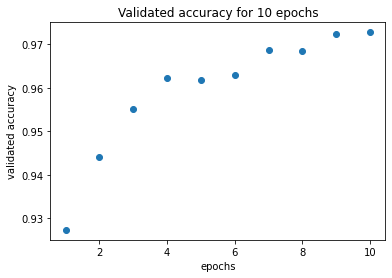

In [7]:
plt.scatter(n, v)
plt.title('Validated accuracy for 10 epochs') #title
plt.xlabel('epochs') #x label
plt.ylabel('validated accuracy') #y label
plt.show()

In [8]:
a = fit_info.history['accuracy']
n = [1,2,3,4,5,6,7,8,9,10]

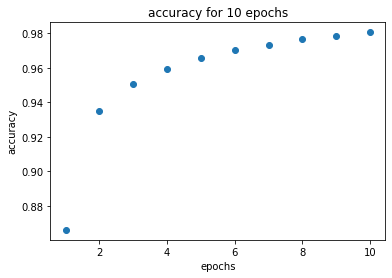

In [9]:
plt.scatter(n, a)
plt.title('accuracy for 10 epochs') #title
plt.xlabel('epochs') #x label
plt.ylabel('accuracy') #y label
plt.show()

In [10]:
#fit_info.history
print(fit_info.history['val_accuracy'])

[0.927299976348877, 0.9440000057220459, 0.9550999999046326, 0.9623000025749207, 0.961899995803833, 0.9628999829292297, 0.9688000082969666, 0.9684000015258789, 0.9724000096321106, 0.9728000164031982]


In [11]:
cc = []
cc = fit_info.history['val_accuracy']
#print(statistics.mean(cc))
print(max(cc))

0.9728000164031982


## D)

Changing the parameters in the model.

In [58]:
epochs = 40

- We have a new number of epochs (40 instead of 10).
- We have also changed from 64 units in both layers to 300 and 500.

In [13]:
model = Sequential()

model.add(Flatten())
model.add(Dense(300, activation = 'relu')) 
model.add(Dense(500, activation = 'relu')) 
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 3s 5ms/step - loss: 0.7165 - accuracy: 0.8081 - val_loss: 0.2327 - val_accuracy: 0.9314
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2079 - accuracy: 0.9384 - val_loss: 0.1642 - val_accuracy: 0.9515
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1522 - accuracy: 0.9566 - val_loss: 0.1287 - val_accuracy: 0.9597
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1193 - accuracy: 0.9662 - val_loss: 0.1091 - val_accuracy: 0.9662
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0982 - accuracy: 0.9719 - val_loss: 0.0985 - val_accuracy: 0.9710
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0788 - accuracy: 0.9763 - val_loss: 0.1005 - val_accuracy: 0.9683
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0686 - accuracy: 0.9806 - val_loss: 0.0837 - val_accuracy: 0.9744
Epoch 

Rewriting the model to use weights. In this method we have two loops. The first loop takes the length of the weight list and runs it for each weight. Inside the weight-loop we have a loop which is running 3 times, due we were tasked to run each weight three times.

In [73]:
#model_weights = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
model_weights = [0.001, 0.002, 0.003, 0.005, 0.008]

In [ ]:
result = []
dump = []    
    for w in range(len(weights)):
        a_score = []
        b_score = []
        count = 0
        while count < 3 :
            model = Sequential()
            model.add(Flatten())
            model.add(Dense(300, activation = 'relu', kernel_regularizer = l2(w))) 
            model.add(Dense(500, activation = 'relu', kernel_regularizer = l2(w))) 
            model.add(Dense(num_classes, activation='softmax'))
            
            model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), 
                          metrics=['accuracy'])
            
            fit_info = model.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1,
                       validation_data=(x_test, y_test))
            score = model.evaluate(x_test, y_test, verbose=0)
            a_score.append(score[1])
            b_score.append(score[0])
            count += 1
        result.append(a_score)
        dump.append(b_score)
    #return res

In [94]:
def model_weight():
    weights = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7] 
    res =[] 
    for weight in weights: 
        counter = 1
        a_score =[]
        while counter < 4: 
            model = Sequential()

            model.add(Flatten())
            model.add(Dense(300, activation = 'relu',kernel_regularizer=l2(weight)))
            model.add(Dense(500, activation = 'relu',kernel_regularizer=l2(weight)))
            model.add(Dense(num_classes, activation='softmax'))


            model.compile(loss=keras.losses.categorical_crossentropy,
                   optimizer=keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

            fit_info = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test))
            score = model.evaluate(x_test, y_test, verbose=0)
            a_score.append(score[1])
            counter += 1
        res.append(a_score) 
        return res

In [99]:
weights = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7] 
res =[] 
for weight in weights: 
    counter = 1
    a_score =[]
    while counter < 4: 
        model = Sequential()

        model.add(Flatten())
        model.add(Dense(300, activation = 'relu',kernel_regularizer=l2(weight)))
        model.add(Dense(500, activation = 'relu',kernel_regularizer=l2(weight)))
        model.add(Dense(num_classes, activation='softmax'))


        model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1),
            metrics=['accuracy'],)

        fit_info = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        a_score.append(score[1])
        counter += 1
    res.append(a_score)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 14698836266506987520.0000 - accuracy: 0.1086 - val_loss: 82212850557834493952.0000 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 78512469627078852608.0000 - accuracy: 0.1132 - val_loss: 68148795016812167168.0000 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 65081390428486025216.0000 - accuracy: 0.1128 - val_loss: 56490624848991617024.0000 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 53947958236137259008.0000 - accuracy: 0.1122 - val_loss: 46826806046235820032.0000 - val_accuracy: 0.1135
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 44719131208619302912.0000 - accuracy: 0.1105 - val_loss: 38816221723097038848.0000 - val_accuracy: 0.1135
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 37069070024831639552.0000 

469/469 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.0980
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.0980
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.1001 - val_loss: nan - val_accuracy: 0.0980
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0980
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0983 - val_loss: nan - val_accuracy: 0.0980
Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 23533165328830642620559523840.0000 - accuracy: 0.1108 - val_loss: 28983510121512998890123558912.0000 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 28969853459643246687570362368.0000 - accuracy: 0.1132 - va

Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 81023273979.6425 - accuracy: 0.1132 - val_loss: 81011064832.0000 - val_accuracy: 0.1135
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 81007025217.3617 - accuracy: 0.1104 - val_loss: 80994811904.0000 - val_accuracy: 0.1135
Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 5306095.9429 - accuracy: 0.1116 - val_loss: 4569705.5000 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 4569491.8745 - accuracy: 0.1115 - val_loss: 4568853.0000 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 4568638.9798 - accuracy: 0.1102 - val_loss: 4567999.5000 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 4567784.4840 - accuracy: 0.1117 - val_loss: 4567138.5000 - val_accuracy: 0.1135
Epoch 5/10
469/469 [==============================] - 3s 5m

In [100]:
res

[[0.11349999904632568, 0.09799999743700027, 0.09799999743700027],
 [0.09799999743700027, 0.11349999904632568, 0.09799999743700027],
 [0.11349999904632568, 0.11349999904632568, 0.11349999904632568],
 [0.09799999743700027, 0.11349999904632568, 0.11349999904632568],
 [0.11349999904632568, 0.09799999743700027, 0.11349999904632568]]

In [95]:
test_weight_func = model_weight()

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 295669086.6563 - accuracy: 0.1096 - val_loss: 268424416.0000 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 256342472.3064 - accuracy: 0.1122 - val_loss: 222505056.0000 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 212490119.4894 - accuracy: 0.1126 - val_loss: 184441552.0000 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 176139602.7234 - accuracy: 0.1118 - val_loss: 152889248.0000 - val_accuracy: 0.1135
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 146007519.4553 - accuracy: 0.1137 - val_loss: 126734368.0000 - val_accuracy: 0.1135
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 121030091.5915 - accuracy: 0.1110 - val_loss: 105054176.0000 - val_accuracy: 0.1135
Epoch 7/10
469/469 [==============================] 

In [97]:
print(test_weight_func)
print()
#print(dump)

[[0.11349999904632568, 0.11349999904632568, 0.11349999904632568]]



In [74]:
def run_model_weight(weights):
    res = []
    
    for w in range(len(weights)):
        a_score = []
        count = 0
        while count < 3 :
            model = Sequential()
            model.add(Flatten())
            model.add(Dense(300, activation = 'relu', kernel_regularizer = l2(w))) 
            model.add(Dense(500, activation = 'relu', kernel_regularizer = l2(w))) 
            model.add(Dense(num_classes, activation='softmax'))
            
            model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), 
                          metrics=['accuracy'])
            
            fit_info = model.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1,
                       validation_data=(x_test, y_test))
            score = model.evaluate(x_test, y_test, verbose=0)
            a_score.append(score[1])
            count += 1
        res.append(a_score)
    return res

Adding weights in a list to pass into the method

In [75]:
res_w = run_model_weight(model_weights)

Epoch 1/40
469/469 [==============================] - 5s 8ms/step - loss: 0.7419 - accuracy: 0.7934 - val_loss: 0.2292 - val_accuracy: 0.9339
Epoch 2/40
469/469 [==============================] - 4s 8ms/step - loss: 0.2163 - accuracy: 0.9376 - val_loss: 0.1582 - val_accuracy: 0.9532
Epoch 3/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1520 - accuracy: 0.9557 - val_loss: 0.1434 - val_accuracy: 0.9575
Epoch 4/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1192 - accuracy: 0.9655 - val_loss: 0.1096 - val_accuracy: 0.9663
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0990 - accuracy: 0.9714 - val_loss: 0.1003 - val_accuracy: 0.9691
Epoch 6/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0830 - accuracy: 0.9761 - val_loss: 0.0974 - val_accuracy: 0.9707
Epoch 7/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0705 - accuracy: 0.9800 - val_loss: 0.0845 - val_accuracy: 0.9734
Epoch 

469/469 [==============================] - 3s 5ms/step - loss: 0.0166 - accuracy: 0.9965 - val_loss: 0.0624 - val_accuracy: 0.9808
Epoch 19/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0137 - accuracy: 0.9976 - val_loss: 0.0637 - val_accuracy: 0.9805
Epoch 20/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0131 - accuracy: 0.9980 - val_loss: 0.0621 - val_accuracy: 0.9813
Epoch 21/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0112 - accuracy: 0.9982 - val_loss: 0.0662 - val_accuracy: 0.9800
Epoch 22/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0105 - accuracy: 0.9983 - val_loss: 0.0617 - val_accuracy: 0.9818
Epoch 23/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0086 - accuracy: 0.9992 - val_loss: 0.0609 - val_accuracy: 0.9821
Epoch 24/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0077 - accuracy: 0.9994 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 25/40

469/469 [==============================] - 3s 6ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9810
Epoch 36/40
469/469 [==============================] - 3s 5ms/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.0623 - val_accuracy: 0.9825
Epoch 37/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9813
Epoch 38/40
469/469 [==============================] - 3s 5ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9817
Epoch 39/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9818
Epoch 40/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0656 - val_accuracy: 0.9811
Epoch 1/40
469/469 [==============================] - 4s 6ms/step - loss: 29.5415 - accuracy: 0.1410 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/40


469/469 [==============================] - 3s 5ms/step - loss: 2.3015 - accuracy: 0.1122 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 13/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1133 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 14/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3015 - accuracy: 0.1128 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 15/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3015 - accuracy: 0.1134 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 16/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3013 - accuracy: 0.1109 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 17/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3014 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 18/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3015 - accuracy: 0.1128 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 19/40

469/469 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 30/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3016 - accuracy: 0.1131 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 31/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 32/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 33/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3016 - accuracy: 0.1117 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 34/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3018 - accuracy: 0.1117 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 35/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 36/40

469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1149 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1139 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 8/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 9/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1125 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 10/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1136 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 11/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3014 - accuracy: 0.1114 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 12/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3016 - accuracy: 0.1109 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 13/40
46

469/469 [==============================] - 3s 5ms/step - loss: 2.3016 - accuracy: 0.1137 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 24/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3013 - accuracy: 0.1120 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 25/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3013 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 26/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3015 - accuracy: 0.1115 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 27/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3016 - accuracy: 0.1120 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 28/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3014 - accuracy: 0.1125 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 29/40
469/469 [==============================] - 3s 5ms/step - loss: 2.3014 - accuracy: 0.1115 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 30/40

469/469 [==============================] - 3s 5ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 1/40
469/469 [==============================] - 4s 6ms/step - loss: 42.6454 - accuracy: 0.1126 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1136 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3014 - accuracy: 0.1127 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 4/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1115 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3014 - accuracy: 0.1129 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/40
469/4

469/469 [==============================] - 3s 7ms/step - loss: 2.3015 - accuracy: 0.1109 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 18/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3015 - accuracy: 0.1130 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 19/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3016 - accuracy: 0.1110 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 20/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3014 - accuracy: 0.1128 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 21/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3014 - accuracy: 0.1127 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 22/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3016 - accuracy: 0.1110 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 23/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 24/40

469/469 [==============================] - 3s 7ms/step - loss: 2.3012 - accuracy: 0.1142 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 35/40
469/469 [==============================] - 4s 8ms/step - loss: 2.3014 - accuracy: 0.1123 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 36/40
469/469 [==============================] - 3s 6ms/step - loss: 2.3015 - accuracy: 0.1111 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 37/40
469/469 [==============================] - 4s 8ms/step - loss: 2.3016 - accuracy: 0.1107 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 38/40
469/469 [==============================] - 4s 8ms/step - loss: 2.3017 - accuracy: 0.1113 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 39/40
469/469 [==============================] - 3s 7ms/step - loss: 2.3010 - accuracy: 0.1138 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 40/40
469/469 [==============================] - 3s 7ms/step - loss: 2.3011 - accuracy: 0.1153 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 1/40


469/469 [==============================] - 3s 7ms/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 12/40
469/469 [==============================] - 3s 7ms/step - loss: 2.3015 - accuracy: 0.1120 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 13/40
469/469 [==============================] - 3s 7ms/step - loss: 2.3014 - accuracy: 0.1132 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 14/40
469/469 [==============================] - 3s 7ms/step - loss: 2.3014 - accuracy: 0.1113 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 15/40
469/469 [==============================] - 3s 7ms/step - loss: 2.3014 - accuracy: 0.1130 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 16/40
469/469 [==============================] - 3s 7ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 17/40
469/469 [==============================] - 3s 7ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 18/40

In [76]:
#print(res_w)
res_w

[[0.9805999994277954, 0.9825000166893005, 0.9811000227928162],
 [0.11349999904632568, 0.11349999904632568, 0.11349999904632568],
 [0.11349999904632568, 0.11349999904632568, 0.11349999904632568],
 [0.11349999904632568, 0.11349999904632568, 0.11349999904632568],
 [0.11349999904632568, 0.11349999904632568, 0.11349999904632568]]

std_mean get both the mean and the standard deviation from one single list, and returns the two values as a list

In [23]:
# TABORT!!!
test_test = [[0.11349999904632568, 0.09799999743700027, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568]]

In [52]:
s1 = np.std([0.11349999904632568, 0.09799999743700027, 0.11349999904632568])
s2 = np.std([0.11349999904632568, 0.11349999904632568, 0.11349999904632568])
s3 = np.std([0.11349999904632568, 0.11349999904632568, 0.11349999904632568])
s4 = np.std([0.11349999904632568, 0.11349999904632568, 0.11349999904632568])
s5 = np.std([0.11349999904632568, 0.11349999904632568, 0.11349999904632568])

print(s1)
print(s2)
print(s3)
print(s4)
print(s5)

0.007306770830904264
0.0
0.0
0.0
0.0


In [18]:
def std_mean(lst):
    val_mean = []
    val_std = []
    
    for i in lst:
        val_mean.append(np.mean(i))
        val_std.append(np.std(i)) 
    return val_mean, val_std

In [20]:
def get_mean(lst):
    val_mean = []
    
    for i in lst:
        val_mean.append(np.mean(i))
    return val_mean

In [27]:
def get_std(lst):
    val_std = []

    for i in lst:
        val_std.append(np.std(i))
        #print(val_std)
    return val_std

In [36]:
np.std(test_test)

0.0038663797011026938

In [50]:
# standard deviation
tt_test_std=[]
for i in test_test:
    temp = np.std(i)
    tt_test_std.append(temp)
tt_test_std

[0.007306770830904264, 0.0, 0.0, 0.0, 0.0]

In [35]:
tt_test_mean = []
tt_test_std = []

tt_test_mean = get_mean(test_test)
tt_test_std = get_std(test_test)

print('MEAN', tt_test_mean)
print()
print('STD',tt_test_std)

[0.007306770830904264]
[0.007306770830904264, 0.0]
[0.007306770830904264, 0.0, 0.0]
[0.007306770830904264, 0.0, 0.0, 0.0]
[0.007306770830904264, 0.0, 0.0, 0.0, 0.0]
MEAN [0.10833333184321721, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568]

STD [0.007306770830904264, 0.0, 0.0, 0.0, 0.0]


get_bounds get the upper and lower bounds respectivly from a single list

In [31]:
def get_bounds(lst, lst2):
    lst_u = []
    lst_l = []
    cc = 0
    
    for i in lst:
        t1 = i + lst2[cc]
        t2 = i - lst2[cc]
        lst_u.append(t1)
        lst_l.append(t2)
        cc += 1
    return lst_u, lst_l

In [36]:
# upper bound std
sdp=[]
tick=0
for i in mean_val:    
    new=i+standard_dev[tick]
    sdp.append(new)
    tick+=1
sdp

[0.9814164366570779,
 0.11349999904632568,
 0.11349999904632568,
 0.11349999904632568,
 0.11349999904632568]

Calling the methods from above

In [37]:
standard_dev = []
mean_val = []

mean_val, standard_dev = std_mean(res_w)
print(standard_dev)
print(mean_val)

[0.0006164437778461185, 0.0, 0.0, 0.0, 0.0]
[0.9807999928792318, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568]


In [34]:
ul, ll = get_bounds(mean_val,standard_dev)
print(ul)
print(ll)

[0.9814164366570779, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568]
[0.9801835491013857, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568]


In [26]:
x= ['0.001', '0.0001', '0.00001', '0.000001', '0.0000001'] # weight x tick labels 

<function matplotlib.pyplot.show(close=None, block=None)>

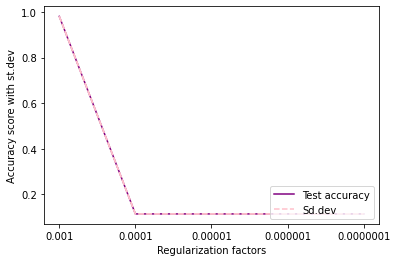

In [27]:
plt.plot(x,mean_val, color='purple')
plt.plot(x,ul,color='pink',linestyle='dashed')
plt.plot(x,ll,color='pink',linestyle='dashed')
plt.ylabel('Accuracy score with st.dev')
plt.xlabel('Regularization factors')
plt.legend(['Test accuracy', 'Sd.dev'], loc='lower right')
plt.savefig('accuracy')
plt.show